In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import torch 
import utils 

import pprint
import datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
path = "./out/pipeline_results/GroundingDinoTiny_SamWrapper_h_categories_imagenet_val_40_09_10 "
loader = datasets.ResultLoader(path) 
name = loader.load_config()["dataset"]["name"]
dataset = loader.load_same_dataset() #prepare the same dataset is is in config for visuals?
# Links to result folders for coco dataset for different sets of prompts using different detection (or prompts)
#       coco classes:
#       general:
#       categories:
#       GT without middle:
# Imagenet small samples:
#   ./out/pipeline_results/GroundingDinoTiny_SamWrapper_h_categories_imagenet_val_40_09_10 
#   ./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_categories_imagenet_val_30_09_10

In [42]:
result_dict = loader.load_metrics() 
# can load whatever here, then dissect the metrics dict
print(result_dict["detection"].keys())

print("\nDetection avg. IoU:")
print(result_dict["detection"]["avg iou"])

dict_keys(['TP', 'FN', 'FP', 'Recall', 'Precision', 'F1', 'avg iou', 'mAP without classes', 'mAP with classes'])

Detection avg. IoU:
nan


prompt list:  categories
Detection:
 TP: 0, FP: 2105, FN: 0
 Precision:         0.0
 Recall:            0.0
 F1-Measure:        0.0
 Average IoU:       nan
     mAP:  -1.0
     mAR - small:  -1.0
     mAR - medium:  -1.0
     mAR - large:  -1.0
Segmentation:
 TP: 0, FP: 2105, FN: 0
 Precision:         0.0
 Recall:            0.0
 F1-Measure:        0.0
 Average IoU:       nan
     mAP:  -1.0
     mAR - small:  -1.0
     mAR - medium:  -1.0
     mAR - large:  -1.0


/home.stud/svobo114/.conda/envs/detect_env_clone/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home.stud/svobo114/.conda/envs/detect_env_clone/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


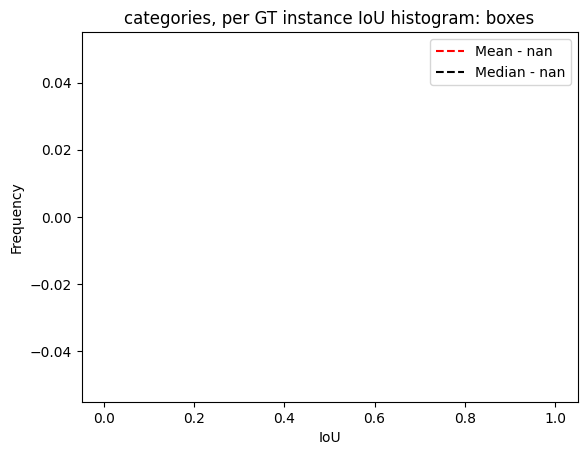

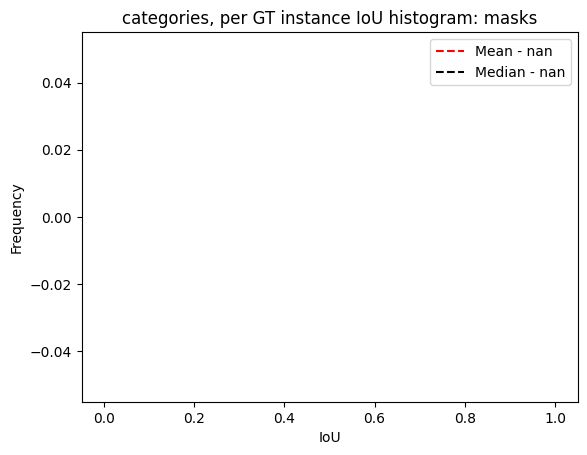

In [43]:
utils.do_overview(loader=loader)

                                          category  total
0                             (tench, Tinca tinca)      0
671  (mountain bike, all-terrain bike, off-roader)      0
658                                      (mitten,)      0
659                                 (mixing bowl,)      0
660               (mobile home, manufactured home)      0


<Axes: title={'center': 'Relative amount missed per class, imagenet'}, xlabel='category'>

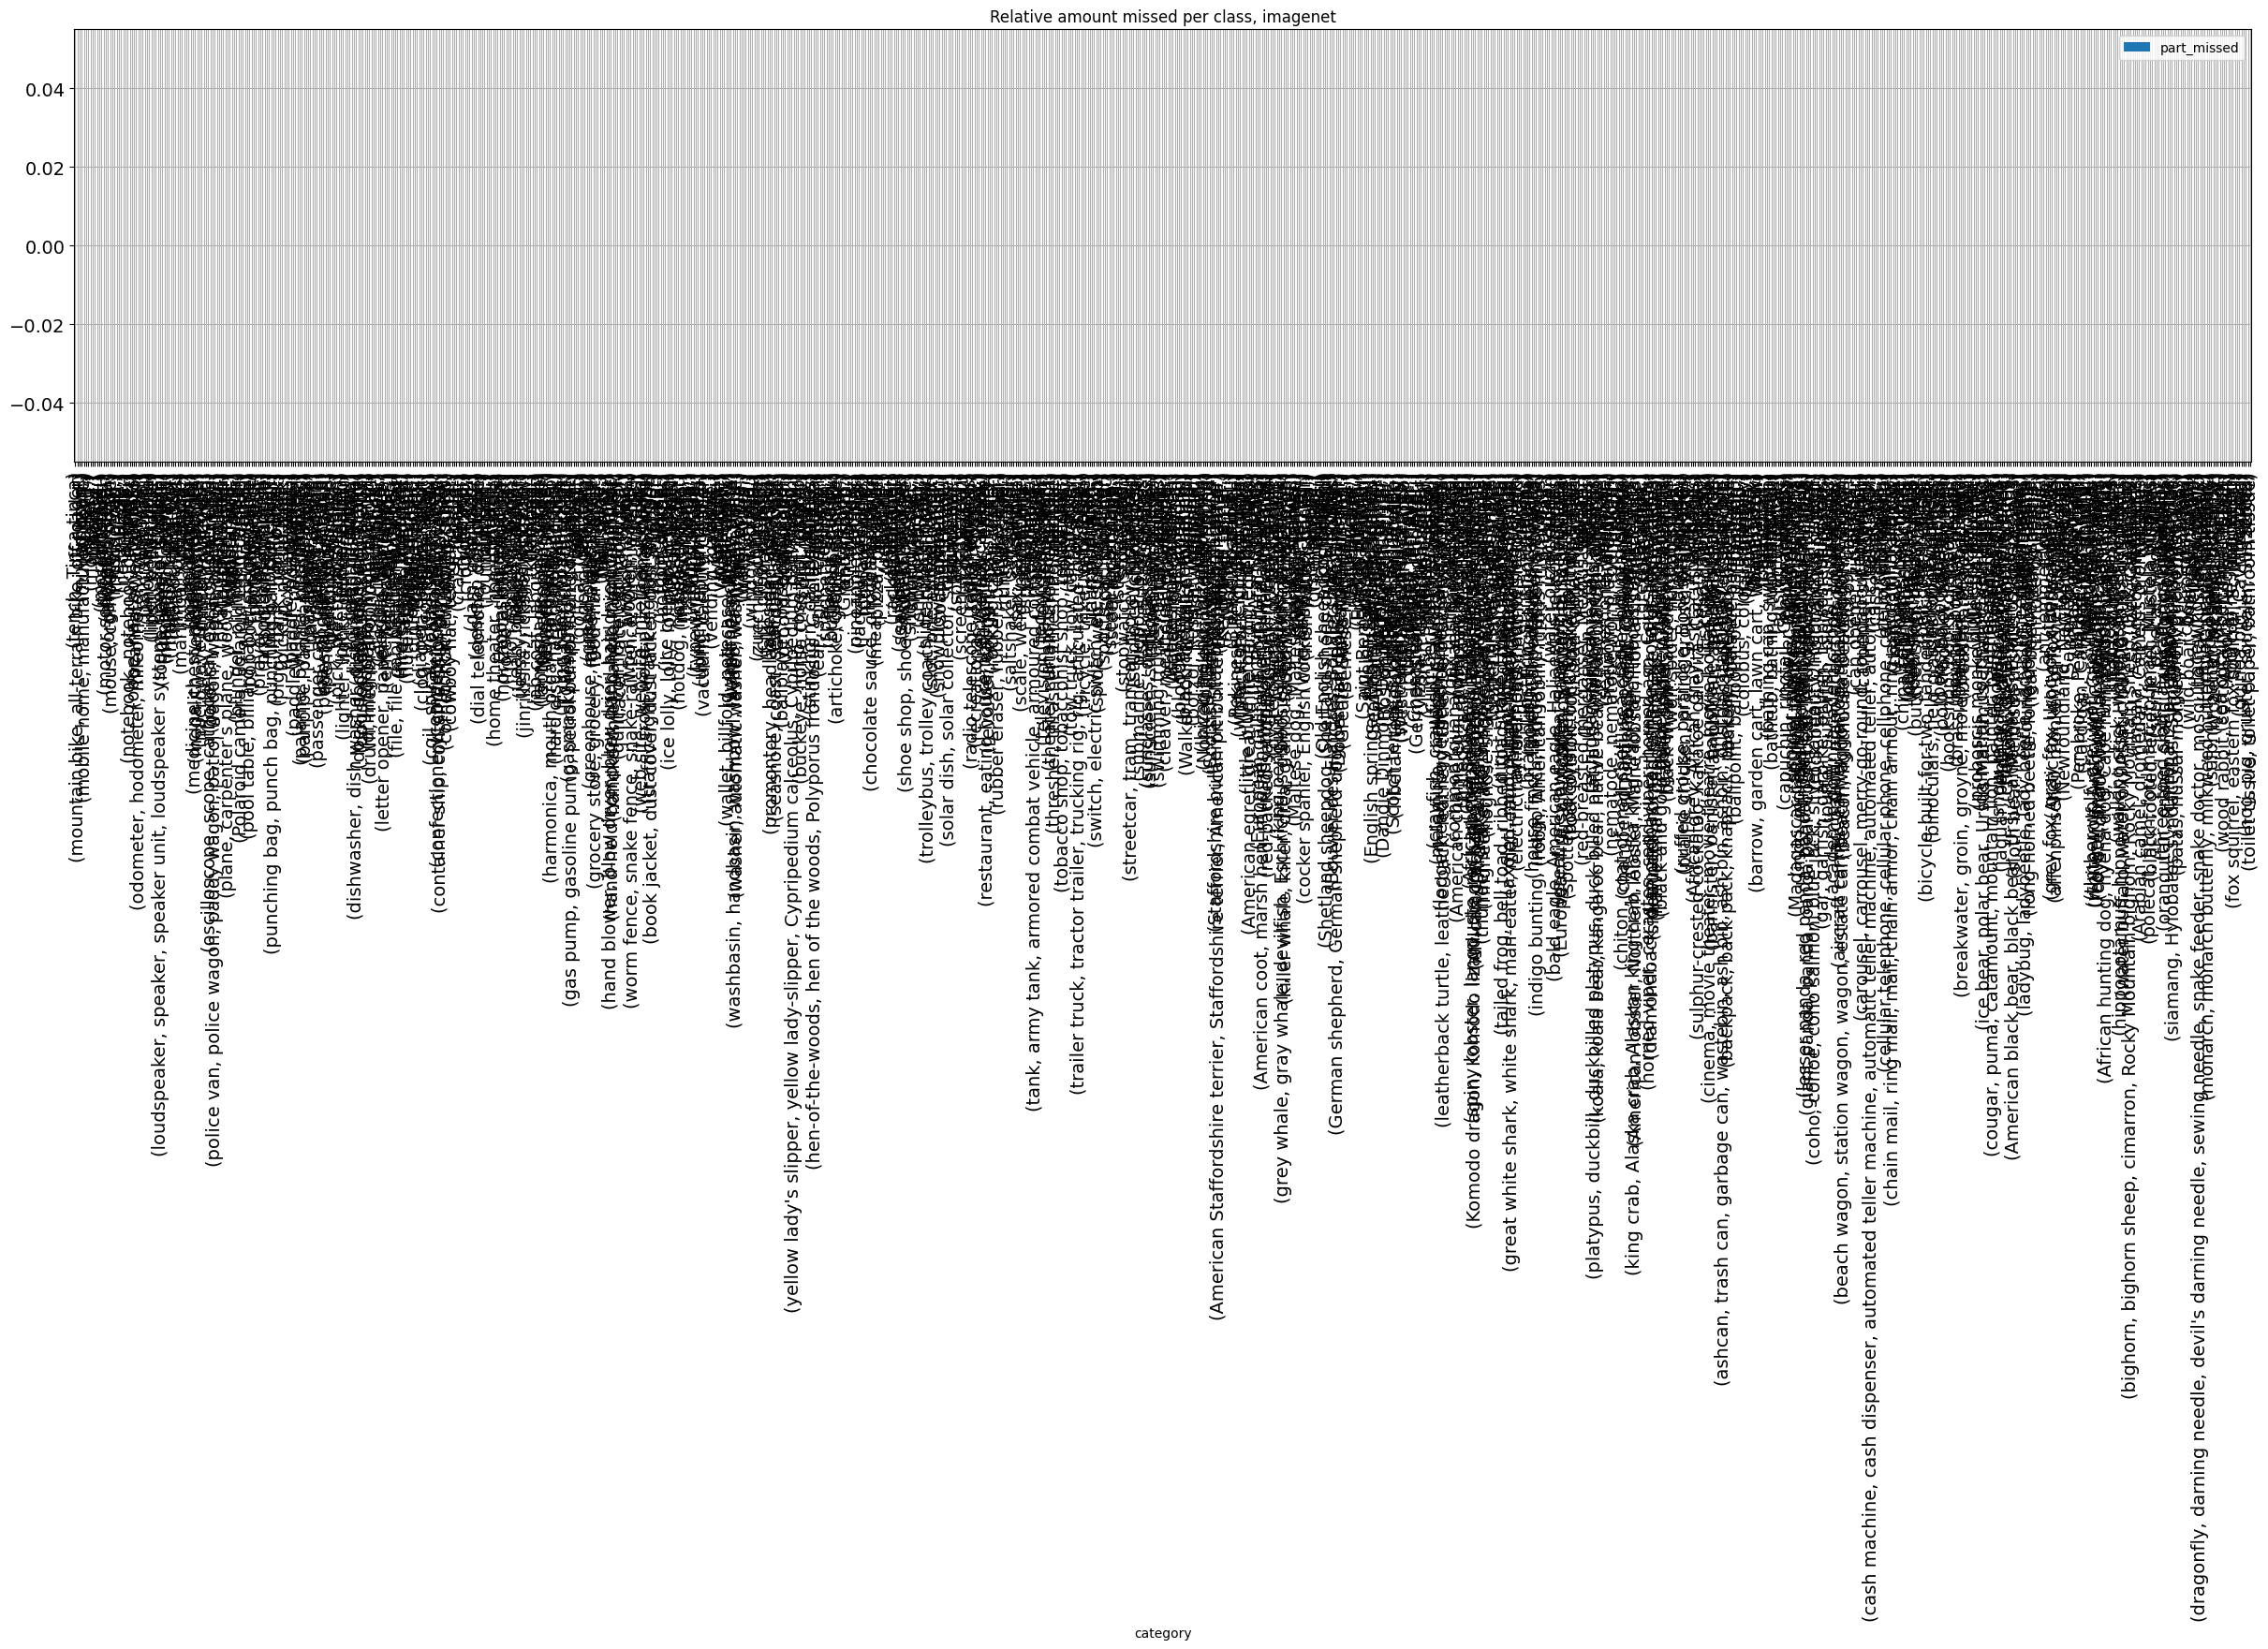

In [5]:
d = utils.load_missed_aggregate_per_class(loader, dataset)
agg_classes = d["boxes_per_class"]

# sort this frame by class by total
agg_classes = agg_classes.sort_values(by="total", ascending=False)
print(agg_classes[["category","total"]].head())
agg_classes[["category", "part_missed"]].plot(
    x="category",
    title=f"Relative amount missed per class, {name}",
    kind="bar",
    figsize=(30, 6),
    grid=True,
    fontsize=14,
)

### Image visualisations, per class

In [6]:
class_to_find = "bird"
class_id = dataset.class_name_to_new_ID(class_to_find)
print("class id in coco default classes: ",class_id)

# load and aggregate boxes and masks, per class and filtered by iou=0.0
d = utils.load_missed_aggregate_per_class(loader,dataset) 
missed_boxes = d["frame_boxes"]

# which images have missed boxes from this one class?
only_one_class = missed_boxes[missed_boxes["gt_class"] == class_id]
image_ids = only_one_class["image_id"].unique()

# visuals
for how_much,image_index in enumerate(image_ids):
    # filter all the boxes per image , in one image..
    if how_much>30: #early stop, too much images
        break

    idx =int(image_index)
    print(f"Image index: {idx}")
    for_image = only_one_class[only_one_class["image_id"] == idx]
    aggregated_gt = for_image["gt"].values

    image = dataset[idx]["image"]
    utils.print_masks_boxes(image=image,masks=None,boxes=aggregated_gt,scale=8)

class id in coco default classes:  -1


### Visualise stored detections:

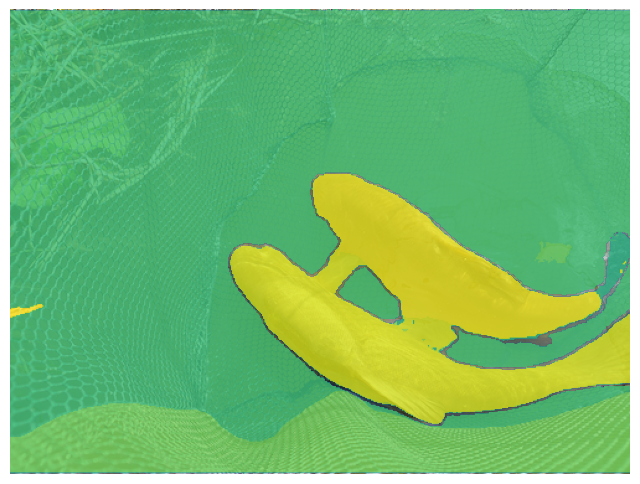

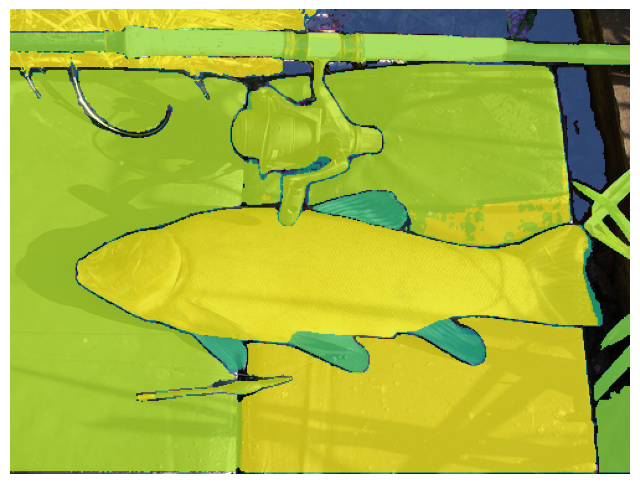

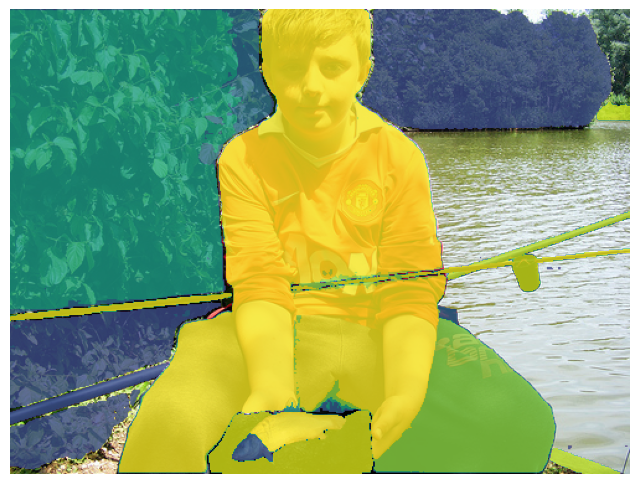

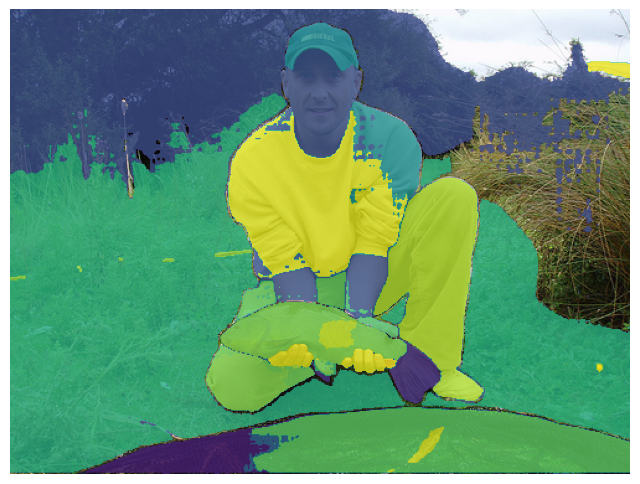

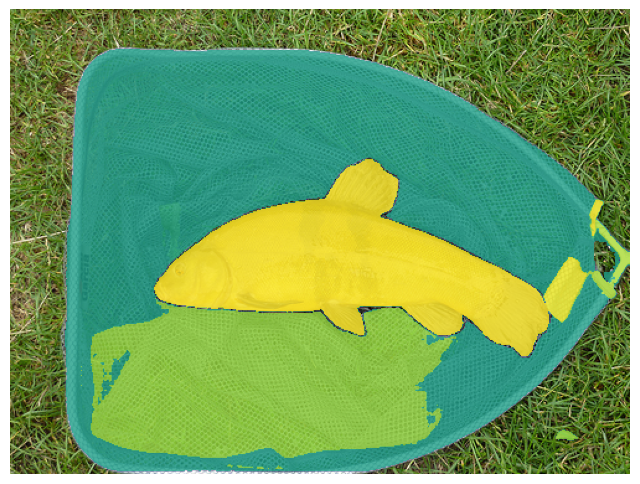

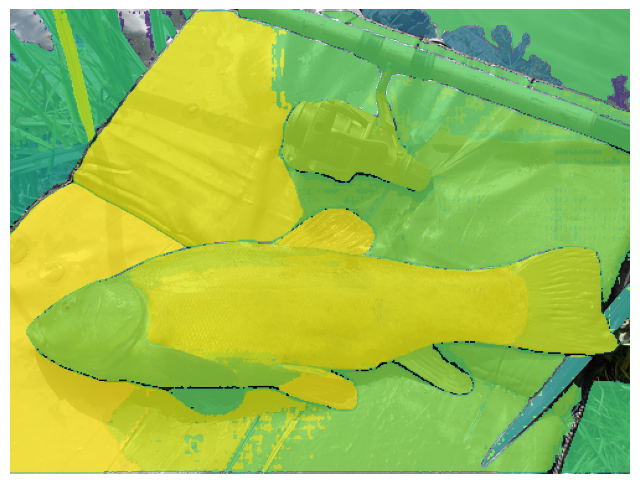

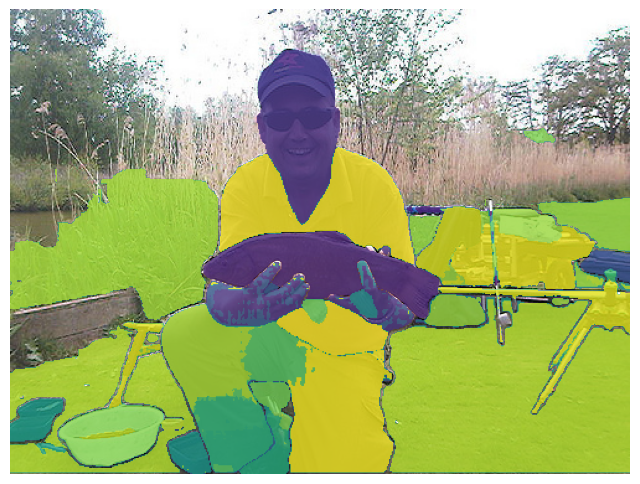

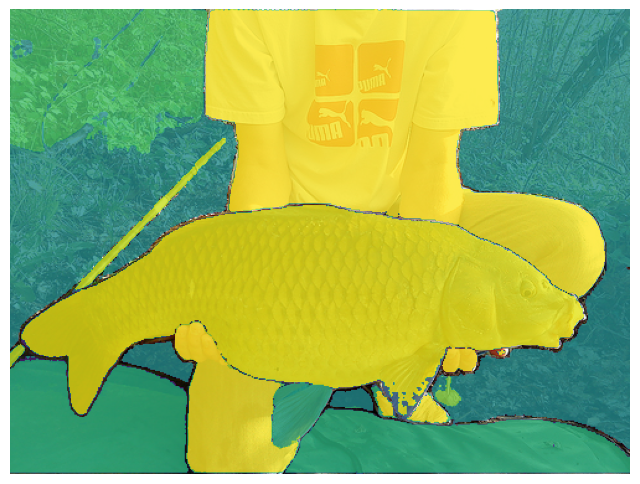

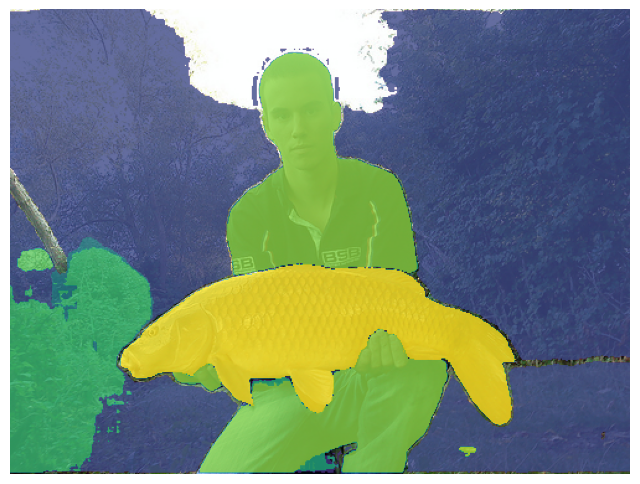

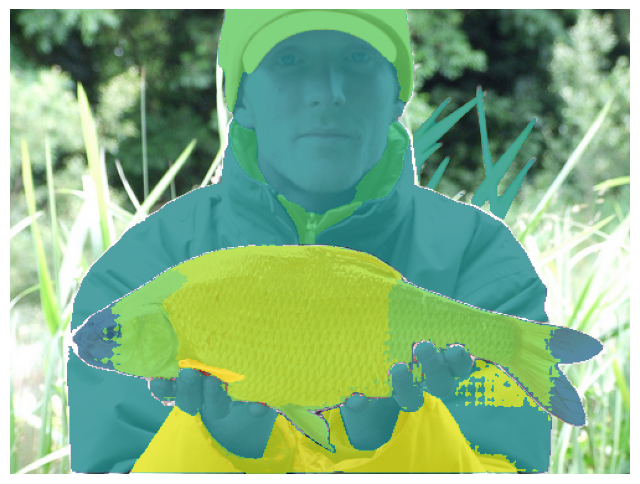

In [45]:
indices = np.arange(10)# can eb anything alse, maybe filter results by some criterion?
for idx in indices:
    d = loader.load_results_per_image(idx)
    image = dataset[idx]['image']
    utils.print_masks_boxes(image = image, masks=d["masks"],boxes=[],scale=8, linewidth=2)

### Comparison, per class

In [8]:
paths = [
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_5000_09_04",
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_general_coco_val_5000_09_04",
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_categories_coco_val_5000_09_04",
]
names=["Coco classes","General","Categories"]

absolute, relative = utils.prompt_sets_comparison(
    paths=paths, names=names, dataset=dataset
)
absolute = absolute.sort_values(by="Totals", ascending=False)
relative = relative.sort_values(by="Totals", ascending=False)

to_show = absolute.columns[:4]
fontsize = 14
figsize=(30,6)
# plot grouped bar chart
absolute[to_show].plot(
    x="Category",
    kind="bar",
    stacked=False,
    title="Missed Instances per class",
    figsize=figsize,
    fontsize=fontsize,
)

# plot grouped bar chart
relative[to_show].plot(
    x="Category",
    kind="bar",
    stacked=False,
    title="Percentage of Missed Instances per class",
    figsize=figsize,
    fontsize=fontsize,
)
absolute[["Totals", "Category"]].plot(
    x="Category",
    title = "Total amount per class",
    kind="bar",
    figsize=figsize,
    grid=True,
    fontsize=fontsize,
)

absolute[["Totals", "Category"]].plot(
    x="Category",
    kind="bar",
    figsize=figsize,
    title="Total amount per class, log scale",
    logy=True,
    grid=True,
    fontsize=fontsize,
)

FileNotFoundError: [Errno 2] No such file or directory: './out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_5000_09_04/boxes_df.pkl'

In [ ]:
# for books only? and only full dataset class names?